# 数据挖掘-预测贷款用户是否逾期
## Task2：特征工程（2天）

------
### 1&emsp;数据探索

&emsp;&emsp;Task1 中数据分析也属于数据探索的一部分，但 Task1 主要是 **对数据的整体感知以及简单的数据清洗。**

&emsp;&emsp;这里数据探索的工作主要是 **分别对单个特征进行逐一分析。**

 - 导入宏包

In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
mpl.rcParams['font.sans-serif']=[u'SimHei']
mpl.rcParams['axes.unicode_minus']=False

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_column', 100)
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.float_format',lambda x : '%.5f' % x)

 - 导入数据

In [70]:
data = pd.read_csv('./data/newdata.csv', encoding='gbk')
data.head().T

,0,1,2,3,4
low_volume_percent,0.01,0.02,0.04,0.00,0.01
middle_volume_percent,0.99,0.94,0.96,0.96,0.99
take_amount_in_later_12_month_highest,0.00,2000.00,0.00,2000.00,0.00
trans_amount_increase_rate_lately,0.90,1.28,1.00,0.13,0.46
trans_activity_month,0.55,1.00,1.00,0.57,1.00
trans_activity_day,0.31,0.46,0.11,0.78,0.17
transd_mcc,17.00,19.00,13.00,22.00,13.00
trans_days_interval_filter,27.00,30.00,68.00,14.00,66.00
trans_days_interval,26.00,14.00,22.00,6.00,42.00
regional_mobility,3.00,4.00,1.00,3.00,1.00


 - **单变量分析**

In [91]:
t = 0
name_list_continuous = []
name_list_discrete = []
for i,name in enumerate(data.columns):
    name_sum = data[name].value_counts().shape[0]
    if name_sum < 60:
        name_list_discrete.append(name)
    else:
        name_list_continuous.append(name)
        
print('name_list_discrete is %d'%len(name_list_discrete))
print('name_list_continuous is %d'%len(name_list_continuous))

name_list_discrete is 45
name_list_continuous is 39


1. 连续型

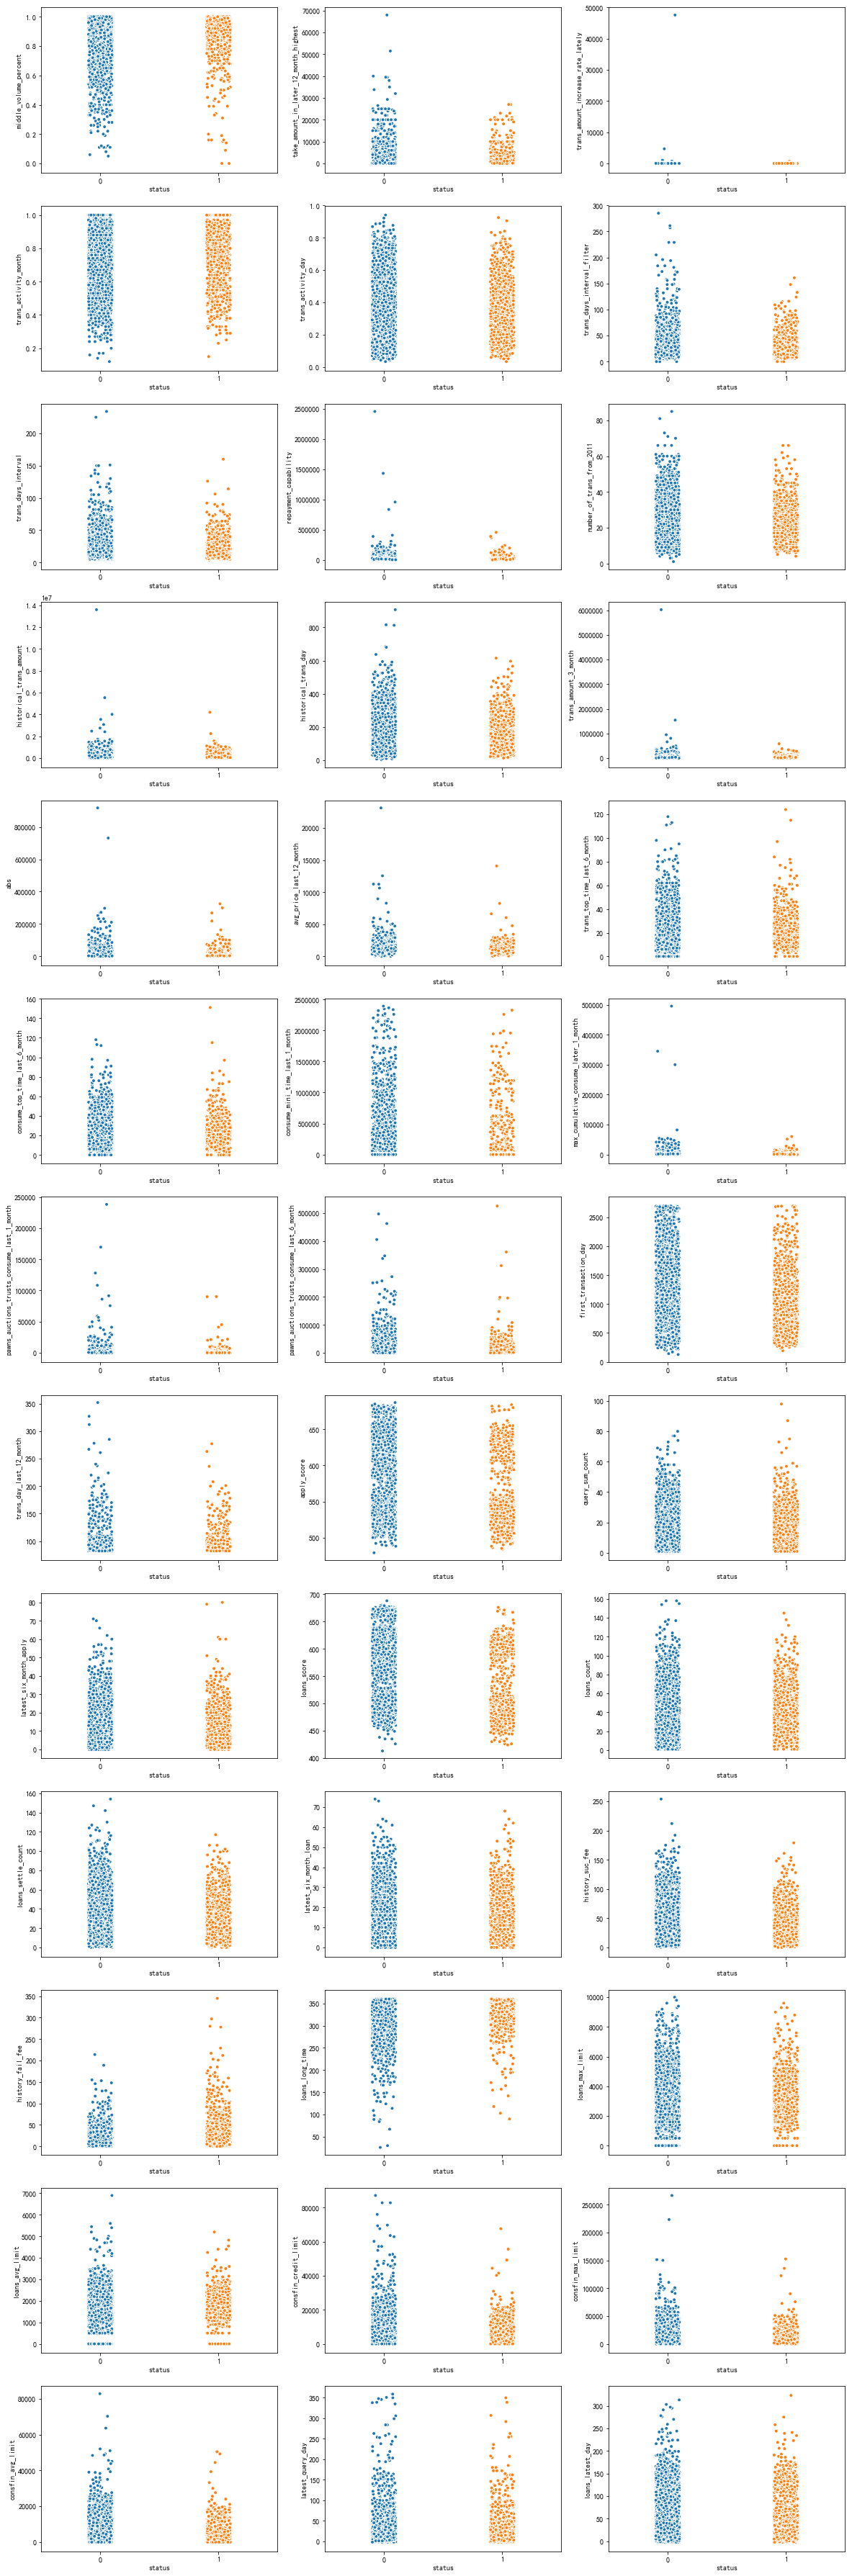

In [104]:
f, ax = plt.subplots(13, 3, figsize=(20, 65))

for i,name in enumerate(name_list_continuous):     
#    sns.distplot(data[name], kde=True, ax=ax[i // 3][i % 3])
    sns.stripplot(x='status',
                  y=name,
                  data=data,
                  jitter = True,    # jitter → 当点数据重合较多时，用该参数做一些调整，也可以设置间距如：jitter = 0.1
                  size = 5, edgecolor = 'w',linewidth=1,marker = 'o',
                  ax=ax[i // 3][i % 3]
                  )

2. 离散型

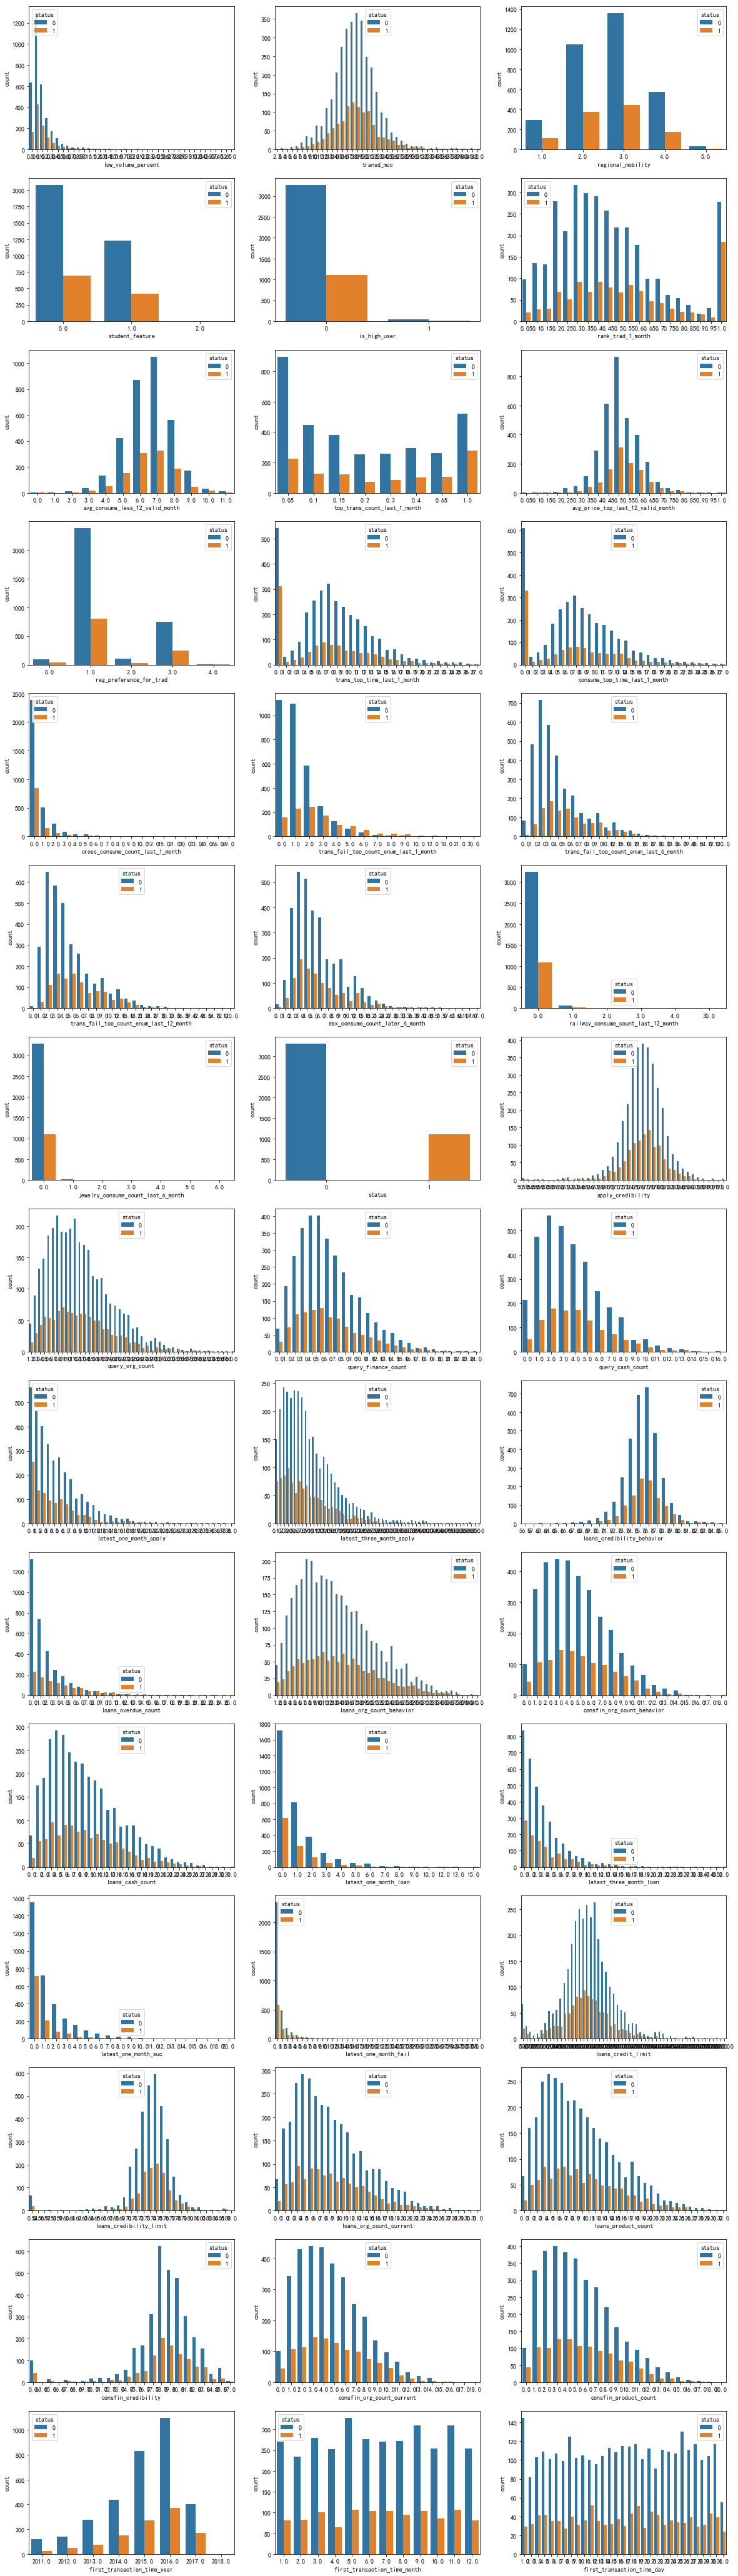

In [94]:
f, ax = plt.subplots(15, 3, figsize=(20, 75))

for i,name in enumerate(name_list_discrete):     
    sns.countplot(data=data, x=name, hue='status',  ax=ax[i // 3][i % 3])

 - 多变量分析
  
   这里采用相关系数分析各指标间共线性情况
   
   （仅输出线性相关系数大的指标）

In [133]:
corrdf = data.corr()

for i,name1 in enumerate(corrdf.columns):
    for j,name2 in enumerate(corrdf.columns):
        if (abs(corrdf[name1][name2])>0.8) & abs((corrdf[name1][name2]<1)) & (j > i):
            print("{:40}  {:40} corr is：{}".format(name1, name2, corrdf[name1][name2]))

trans_activity_day                        historical_trans_day                     corr is：0.8554528967217759
rank_trad_1_month                         top_trans_count_last_1_month             corr is：0.8564482176703091
trans_top_time_last_1_month               consume_top_time_last_1_month            corr is：0.9267196464395949
trans_top_time_last_6_month               consume_top_time_last_6_month            corr is：0.9303099412735287
trans_fail_top_count_enum_last_6_month    trans_fail_top_count_enum_last_12_month  corr is：0.8942350728959988
first_transaction_day                     first_transaction_time_year              corr is：-0.9815545091838808
apply_score                               loans_score                              corr is：0.9730648458517456
query_org_count                           query_finance_count                      corr is：0.8849365602754028
query_org_count                           query_cash_count                         corr is：0.8456944134384223
query_org

------
### 2&emsp;特征衍生

特征衍生也称特征构建，是指从原始数据中构建新的特征，属于特征选择的一种手段。

经过数据分析及数据预处理后得到基础特征后，一般可以采用如下几种方式进行特征衍生：

 - **特征拓展**
 
 - **合成特征**
 
 - **特征组合**
 
 - **特征交叉**
 
 
 其中特征交叉属于特征组合的一个子集

**2.1 特征拓展**

------
### 3&emsp;特征选择

特征选择方法有很多，一般分为三类：

 - **过滤法**
 
   过滤法比较简单，它按照特征的发散性或者相关性指标对各个特征进行评分，设定评分阈值或者待选择阈值的个数，选择合适特征。
   
   - 方差选择法
   
   - 相关系数法
  
   - 卡方检验
  
   - 互信息法（IV 法）
   
   - ...
  
 - **包装法**
 
   根据目标函数，通常是预测效果评分，每次选择部分特征，或者排除部分特征。
   
   - 递归特征消除法
   
   - ...
   
 - **嵌入法**
 
   它先使用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据权值系数从大到小来选择特征。类似于过滤法，但是它是通过机器学习训练来确定特征的优劣，而不是直接从特征的一些统计学指标来确定特征的优劣。
   
   - 基于惩罚项的特征选择法
   
   - 基于树模型的特征选择法
   
   - ...
   
 - **...**
   
由于时间关系，这里采用所要求的 iv 法与 随机森林法

**3.1 iv 法**

参考文献：[IV值的计算与使用](https://www.jianshu.com/p/cc4724a373f8)

 - 生成构造函数

In [156]:
def IV_cal(Xvar, Yvar):
    N_0=np.sum(Yvar==0)
    N_1=np.sum(Yvar==1)
    N_0_group=np.zeros(np.unique(Xvar).shape)
    N_1_group=np.zeros(np.unique(Xvar).shape)
    for i in range(len(np.unique(Xvar))):
        N_0_group[i] = Yvar[(Xvar==np.unique(Xvar)[i])&(Yvar==0)].count()
        N_1_group[i] = Yvar[(Xvar==np.unique(Xvar)[i])&(Yvar==1)].count()
    iv = np.sum((N_0_group/N_0-N_1_group/N_1)*np.log((N_0_group/N_0)/(N_1_group/N_1)))
    if iv>=1.0:## 处理极端值
        iv=1
    return iv

def main_IV(df,Yvar):
    ivlist=[]
    for col in df.columns:
        iv=IV_cal(df[col],Yvar)
        ivlist.append(iv)
    names=list(df.columns)
    iv_df=pd.DataFrame({'Var':names,'IV':ivlist},columns=['Var','IV'])
    return iv_df

 - 计算结果

In [150]:
Y = data['status']
X = data.drop(['status'], axis=1)
IV_df = main_IV(X,Y)

In [155]:
print(IV_df.sort_values('IV', inplace=False, ascending=True))

                                           Var   Iv
10                             student_feature 0.00
12                                is_high_user 0.00
23                     reg_preference_for_trad 0.01
9                            regional_mobility 0.01
81                first_transaction_time_month 0.01
75                       consfin_product_count 0.03
82                  first_transaction_time_day 0.04
20                top_trans_count_last_1_month 0.07
16                           rank_trad_1_month 0.13
51                  loans_credibility_behavior 1.00
61                             history_suc_fee 1.00
60                       latest_six_month_loan 1.00
59                     latest_three_month_loan 1.00
58                       latest_one_month_loan 1.00
57                            loans_cash_count 1.00
56                  consfin_org_count_behavior 1.00
55                    loans_org_count_behavior 1.00
54                         loans_overdue_count 1.00
47          

 - IV值参考表
 
| Information Value| Predictive Power|
| ---|---|
| < 0.02| useless for prediction|
| 0.02 to 0.1| Weak predictor|
| 0.1 to 0.3 | Medium predictor|
| 0.3 to 0.5 | Strong predictor|
| >0.5 |Suspicious or too good to be true|

 - 剔除 IV 值小于 0.10 的特征

In [159]:
key = {'student_feature',
       'is_high_user',
       'reg_preference_for_trad', 
       'regional_mobility',
       'first_transaction_time_month',
       'consfin_product_count',
       'first_transaction_time_day',
       'top_trans_count_last_1_month'}
data.drop(key, axis=1, inplace=True)
data.shape

(4423, 76)

### 3.2 随机森林

 - 生成构造函数

In [163]:
def RF_score(X, Y):
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=5000, random_state=2018, n_jobs=-1)
    forest.fit(X, Y)
    importance = forest.feature_importances_
    imp_score = np.argsort(importance)[::-1]
    return importance[imp_score]

def main_RF(X, Y):
    score = RF_score(X, Y)
    names=list(X.columns)
    RF_df=pd.DataFrame({'Var':names,'RF_score':score},columns=['Var','RF_score'])
    return RF_df

 - 计算得分

In [170]:
Y = data['status']
X = data.drop(['status'], axis=1)
RF_df = main_RF(X, Y)

In [171]:
print(RF_df.sort_values('RF_score', inplace=False, ascending=True))

                                           Var  RF_score
74                 first_transaction_time_year   0.00019
73                            loans_latest_day   0.00076
72                            latest_query_day   0.00357
71                           consfin_avg_limit   0.00396
70                           consfin_max_limit   0.00547
69                   consfin_org_count_current   0.00697
68                         consfin_credibility   0.00727
67                        consfin_credit_limit   0.00751
66                             loans_avg_limit   0.00754
65                             loans_max_limit   0.00806
64                         loans_product_count   0.00814
63                     loans_org_count_current   0.00819
62                     loans_credibility_limit   0.00857
61                          loans_credit_limit   0.00866
60                             loans_long_time   0.00872
59                       latest_one_month_fail   0.00886
58                        lates